In [26]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
import seaborn as sb

# HR analytics

**Objective**: Predict when a person will leave their job.

**Data:** From kaggle. See [here](https://www.kaggle.com/giripujar/hr-analytics/tasks)

## Start by looking at general features and properties of the data

In [123]:
df = pd.read_csv("data/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


First look at the header, looks like our objective function is given by columen `left`. There's seems to be at least 3 categorical features: `promotion_last_5years`,`Department`,`salary`. Maybe `Work_accident` could be another one.

Check if there are any null values

In [124]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [125]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                       'promotion_last_5years':'promotion'})

In [126]:
df.head(5)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Some statistics

In [127]:
df.shape

(14999, 10)

In [128]:
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [129]:
turnover_Summary = df.groupby('left')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [130]:
fraction_leaving = df.left.value_counts()[1]/len(df)
print("Fraction of people leaving: {:0.2f}".format(fraction_leaving))

Fraction of people leaving: 0.24


In [131]:
#correlation matrix
corr = df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


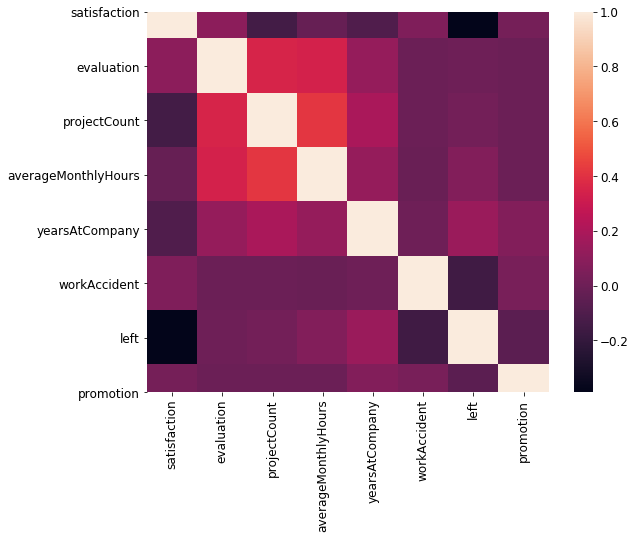

In [132]:
rcParams['figure.figsize']=9,7
sb.heatmap(corr)

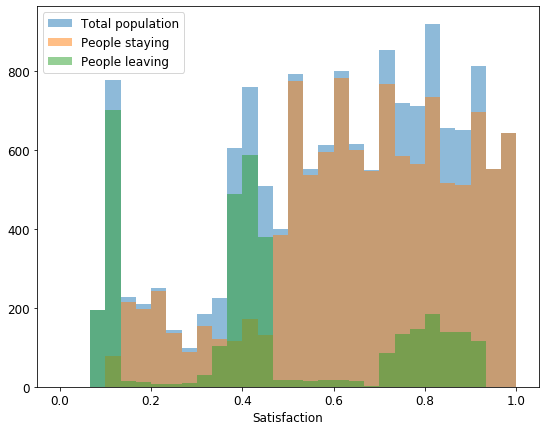

In [133]:
#Compare distribution of satisfaction of total population vs left
rcParams['figure.figsize']=9,7
rcParams['font.size']=12

pop_sat=df['satisfaction']
left_sat = df[df['left']==1]['satisfaction']
stay_sat = df[df['left']==0]['satisfaction']


plt.hist(pop_sat,bins=30,range=[0,1],alpha=0.5,label='Total population')
plt.hist(stay_sat,bins=30,range=[0,1],alpha=0.5,label='People staying')
plt.hist(left_sat,bins=30,range=[0,1],alpha=0.5,label='People leaving')
plt.xlabel('Satisfaction')
plt.legend()
#plt.grid()


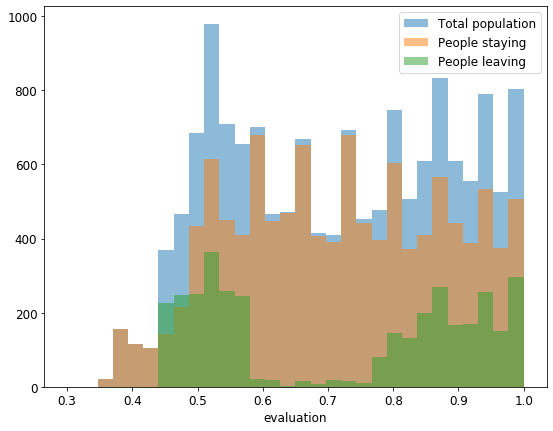

In [134]:
evaluation=df['evaluation']
left_ev= df[df['left']==1]['evaluation']
stay_ev = df[df['left']==0]['evaluation']


plt.hist(evaluation,bins=30,range=[0.3,1],alpha=0.5,label='Total population')
plt.hist(stay_ev,bins=30,range=[0.3,1],alpha=0.5,label='People staying')
plt.hist(left_ev,bins=30,range=[0.3,1],alpha=0.5,label='People leaving')
plt.xlabel('evaluation')
plt.legend()


(array([  53., 1586.,    0.,  890.,  833.,  209.]),
 array([2.        , 2.66666667, 3.33333333, 4.        , 4.66666667,
        5.33333333, 6.        ]),
 <a list of 6 Patch objects>)

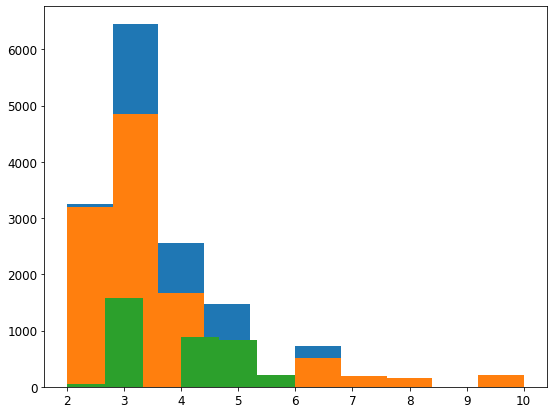

In [135]:
plt.hist(df['yearsAtCompany'],bins=10) #Could bucket some of this
plt.hist(df[df['left']==0]['yearsAtCompany'],bins=10)
plt.hist(df[df['left']==1]['yearsAtCompany'],bins=6)

(array([297., 263., 248., 278., 302., 207.,  13.,   6.,  14.,   8.,   9.,
         11.,   6.,   9.,  26.,  94.,  87.,  98., 107., 193., 173., 199.,
        197., 133., 131.,  93.,  96.,  84.,  68., 121.]),
 array([ 5.25      ,  5.50555556,  5.76111111,  6.01666667,  6.27222222,
         6.52777778,  6.78333333,  7.03888889,  7.29444444,  7.55      ,
         7.80555556,  8.06111111,  8.31666667,  8.57222222,  8.82777778,
         9.08333333,  9.33888889,  9.59444444,  9.85      , 10.10555556,
        10.36111111, 10.61666667, 10.87222222, 11.12777778, 11.38333333,
        11.63888889, 11.89444444, 12.15      , 12.40555556, 12.66111111,
        12.91666667]),
 <a list of 30 Patch objects>)

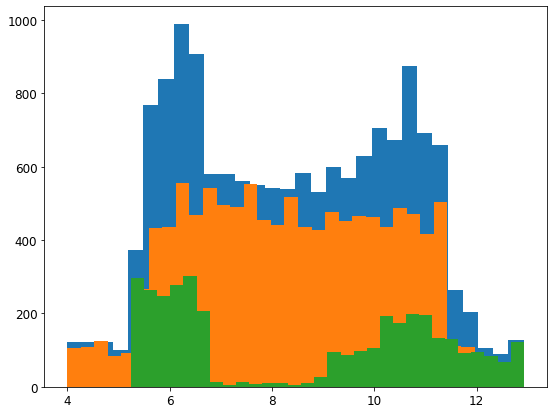

In [136]:
plt.hist(df['averageMonthlyHours']/24,bins=30) #Could bucket some of this
plt.hist(df[df['left']==0]['averageMonthlyHours']/24,bins=30)
plt.hist(df[df['left']==1]['averageMonthlyHours']/24,bins=30)

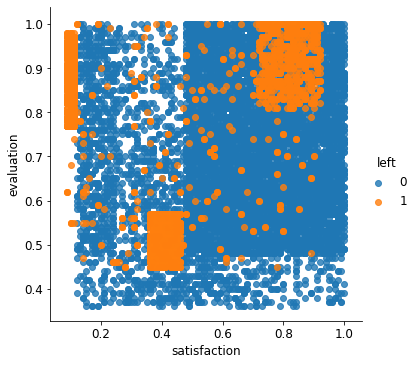

In [137]:
sb.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='left')


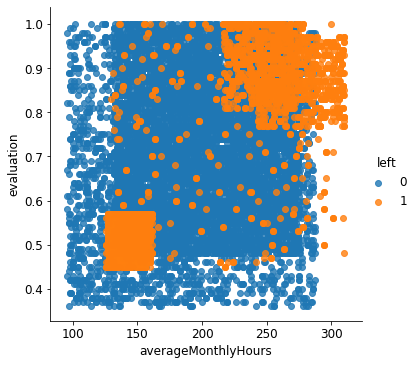

In [138]:
sb.lmplot(x='averageMonthlyHours', y='evaluation', data=df, fit_reg=False, hue='left')


## Start with a ML for regression

In [139]:
import tensorflow as tf

In [140]:
# Normalize some columns
df.head(5)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [141]:
df['averageMonthlyHours']/=max(df['averageMonthlyHours'])


In [142]:
# move our target function to the back
front = df['left']
df.drop(labels=['left'], axis=1,inplace = True)
df.insert(9, 'left', front)
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary,left
0,0.38,0.53,2,0.506452,3,0,0,sales,low,1
1,0.80,0.86,5,0.845161,6,0,0,sales,medium,1
2,0.11,0.88,7,0.877419,4,0,0,sales,medium,1
3,0.72,0.87,5,0.719355,5,0,0,sales,low,1
4,0.37,0.52,2,0.512903,3,0,0,sales,low,1


In [143]:
# Create numeric categories
feature_columns = []

satisfaction = tf.feature_column.numeric_column('satisfaction')
feature_columns.append(satisfaction)

evaluation = tf.feature_column.numeric_column('evaluation')
feature_columns.append(evaluation)

avgMonthHours = tf.feature_column.numeric_column('averageMonthlyHours')
feature_columns.append(avgMonthHours)

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


In [144]:
#Functions to build and train our model

def build_model(my_learning_rate, feature_layer, my_metrics):
    model=tf.keras.models.Sequential()
    
    model.add(feature_layer)
    
    #topography
    model.add(tf.keras.layers.Dense(units=1,activation=tf.sigmoid,input_shape=(1,)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=my_metrics)
    return model

def train_model(model,dataset,epochs,target_name,
               batch_size=None, shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(target_name))
    history = model.fit(x=features,y=label,batch_size=batch_size,
                       epochs=epochs,shuffle=shuffle)
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    
    return epochs,hist

In [145]:
# plotting function
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

In [146]:
#separate data in training and test
#shuffle data so that we don't miss shapes of histograms
df = df.reindex(np.random.permutation(df.index))
train_df = df.iloc[:11249,:] 
test_df = df.iloc[11250:,:]

In [167]:
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "left"
classification_threshold = 0.25

# Establish the metrics the model will measure.
# METRICS = [
#             tf.keras.metrics.BinaryAccuracy(name='accuracy', 
#                 threshold=classification_threshold),
#             tf.keras.metrics.Precision(thresholds=classification_threshold,
#                 name='precision'),
#             tf.keras.metrics.Recall(thresholds=classification_threshold,
#                                    name='recall')
    
#           ]

METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# create model
my_model = build_model(learning_rate, feature_layer, METRICS)

# train model
epochs, hist = train_model(my_model, train_df, epochs, 
                           label_name, batch_size)

Train on 11249 samples
Epoch 1/20
11249/11249 [==============================] - 1s 55us/sample - loss: 0.7685 - auc: 0.6209
Epoch 2/20
11249/11249 [==============================] - 0s 15us/sample - loss: 0.6661 - auc: 0.6609
Epoch 3/20
11249/11249 [==============================] - 0s 16us/sample - loss: 0.5919 - auc: 0.6909
Epoch 4/20
11249/11249 [==============================] - 0s 13us/sample - loss: 0.5440 - auc: 0.7119
Epoch 5/20
11249/11249 [==============================] - 0s 15us/sample - loss: 0.5189 - auc: 0.7252
Epoch 6/20
11249/11249 [==============================] - 0s 13us/sample - loss: 0.5105 - auc: 0.7292
Epoch 7/20
11249/11249 [==============================] - 0s 16us/sample - loss: 0.5075 - auc: 0.7323
Epoch 8/20
11249/11249 [==============================] - 0s 14us/sample - loss: 0.5053 - auc: 0.7341
Epoch 9/20
11249/11249 [==============================] - 0s 21us/sample - loss: 0.5032 - auc: 0.7362
Epoch 10/20
11249/11249 [==============================] - 

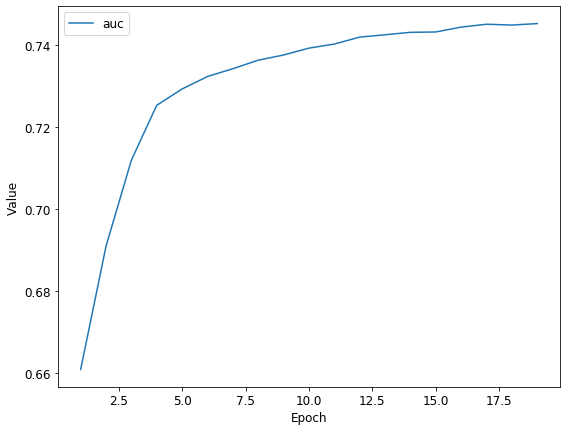

In [168]:
# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['auc'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [169]:
features = {name:np.array(value) for name, value in test_df.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size,)

3749/3749 [==============================] - 0s 59us/sample - loss: 0.4969 - auc: 0.7594


[0.49686431159779815, 0.7593669]

In [173]:
results=my_model.predict(x=features)

In [175]:
results[results<classification_threshold]=0
results[results>=classification_threshold]=1

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)